In [2]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

X_train = []
X_test = []

for filename in ["gap_ResNet50.h5", "gap_Xception.h5", "gap_InceptionV3.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)

In [3]:
from keras.models import *
from keras.layers import *

input_tensor = Input(X_train.shape[1:])
x = input_tensor
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',              metrics=['accuracy'])

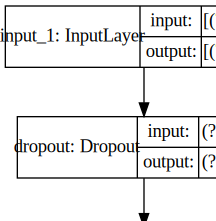

In [14]:
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot, plot
from keras.utils.vis_utils import plot_model

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.fit(X_train, y_train, batch_size=128, epochs=8, validation_split=0.2)

Epoch 1/8
157/157 [==============================] - 1s 4ms/step - loss: 0.5012 - accuracy: 0.7662 - val_loss: 0.4160 - val_accuracy: 0.8860
Epoch 2/8
157/157 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7861 - val_loss: 0.3944 - val_accuracy: 0.8982
Epoch 3/8
157/157 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.8059 - val_loss: 0.3740 - val_accuracy: 0.9080
Epoch 4/8
157/157 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8152 - val_loss: 0.3549 - val_accuracy: 0.9188
Epoch 5/8
157/157 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8353 - val_loss: 0.3373 - val_accuracy: 0.9270
Epoch 6/8
157/157 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8425 - val_loss: 0.3207 - val_accuracy: 0.9340
Epoch 7/8
157/157 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8559 - val_loss: 0.3052 - val_accuracy: 0.9414
Epoch 8/8
157

In [7]:
model.save('model.h5')

In [8]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

391/391 [==============================] - 0s 627us/step


In [12]:
import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    #print(i,"---",fname)
    df.at[index-1,'label'] = y_pred[i]
    
df.to_csv('pred.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.747422
1,2,0.788199
2,3,0.784558
3,4,0.782025
4,5,0.105116
5,6,0.084706
6,7,0.131189
7,8,0.288299
8,9,0.113145
9,10,0.247305
